


# installing necessary libraries

In [ ]:
! pip install audb
!apt-get install ffmpeg
!pip install audioread
! pip install ripser

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.1/240.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.9/150.9 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 56.3 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49

# importing necessary files

In [ ]:
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
# This allows normalization for the specgrams which allows for clearer visualizations
from matplotlib.colors import Normalize
import seaborn as sns

import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import ripser
import warnings
from google.colab import drive
from collections import deque

In [ ]:
# some settings
warnings.filterwarnings('ignore')
# Set style and color palette
sns.set(style='darkgrid', palette='magma')
# Change the setting and put it in a dictionary
plot_settings = {
    'font.family': 'calibri',
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'figure.dpi': 140,
    'axes.titlepad': 15,
    'axes.labelpad': 15,
    'figure.titlesize': 24,
    'figure.titleweight': 'bold',
}
# Use the dictionary variable to update the settings using matplotlib
plt.rcParams.update(plot_settings)
# Check if GPU is available
tf.config.list_physical_devices('GPU')

[]

In [ ]:
from google.colab import drive

# Mount your Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


# preparing datasets


In [ ]:
# Put the cremad directory in a list
cremad = os.listdir('/content/drive/My Drive/content/Dataset/CREMA-D/AudioWAV/AudioMP3')

# Make a list for emotion labels and a list for path to audio files
emotions = []
paths = []
# Loop through all the files and extract the emotion label and path
for file in cremad:
    # Extract the emotion label from the file name
    emotion = file.split('_')[2]
    if emotion == 'SAD':
        emotion = 'sadness'
    elif emotion == 'ANG':
        emotion = 'anger'
    elif emotion == 'DIS':
        emotion = 'disgust'
    elif emotion == 'FEA':
        emotion = 'fear'
    elif emotion == 'HAP':
        emotion = 'happiness'
    elif emotion == 'NEU':
        emotion = 'neutral'
    elif emotion == 'SUR':
        emotion = 'surprise'
    else:
        emotion = 'Unknown'
    # Extract the path
    path = '/content/drive/My Drive/content/Dataset/CREMA-D/AudioWAV/AudioMP3' + file
    # Append the emotion and path to their lists
    emotions.append(emotion)
    paths.append(path)
# Create a dataframe from the lists
cremad_df = pd.DataFrame(emotions, columns=['Emotion'])
cremad_df['Path'] = paths
# Inspect the dataframe
cremad_df.head()

,Emotion,Path
0,fear,/content/drive/My Drive/content/Dataset/CREMA-...
1,anger,/content/drive/My Drive/content/Dataset/CREMA-...
2,neutral,/content/drive/My Drive/content/Dataset/CREMA-...
3,anger,/content/drive/My Drive/content/Dataset/CREMA-...
4,disgust,/content/drive/My Drive/content/Dataset/CREMA-...


In [ ]:
# Put the ravdess directory in a list
ravdess = os.listdir('/content/drive/My Drive/ravdess/archive/audio_speech_actors_01-24/')
# Make a list for emotion labels and a list for path to audio files
emotions = []
paths = []
# Loop through all the actor directories in audio_speech_actors_01-24
for dir in ravdess:
    # Loop through all the files in each directory
    for file in os.listdir('/content/drive/My Drive/ravdess/archive/audio_speech_actors_01-24/' + dir):
        # Extract the emotion label from the file name
        emotion = file.split('-')[2]
        if emotion == '01':
            emotion = 'neutral'
        elif emotion == '02':
            emotion = 'calm'
        elif emotion == '03':
            emotion = 'happiness'
        elif emotion == '04':
            emotion = 'sadness'
        elif emotion == '05':
            emotion = 'anger'
        elif emotion == '06':
            emotion = 'fear'
        elif emotion == '07':
            emotion = 'disgust'
        elif emotion == '08':
            emotion = 'surprise'
        else:
            emotion = 'Unknown'
        # Extract the path
        path = '/content/drive/My Drive/ravdess/archive/audio_speech_actors_01-24/' + dir + '/' + file
        # Append the emotion and path to their lists
        emotions.append(emotion)
        paths.append(path)
# Create a dataframe from the lists
ravdess_df = pd.DataFrame(emotions, columns=['Emotion'])
ravdess_df['Path'] = paths
# Inspect the dataframe
ravdess_df.head()

,Emotion,Path
0,anger,/content/drive/My Drive/ravdess/archive/audio_...
1,happiness,/content/drive/My Drive/ravdess/archive/audio_...
2,sadness,/content/drive/My Drive/ravdess/archive/audio_...
3,calm,/content/drive/My Drive/ravdess/archive/audio_...
4,sadness,/content/drive/My Drive/ravdess/archive/audio_...


In [ ]:
# Put the tess directory in a list
tess = os.listdir('/content/drive/My Drive/TESS/' )
# Make a list for emotion labels and a list for path to audio files
emotions = []
paths = []
# Loop through all the audio file directories
for dir in tess:
    # print(dir)
    # Loop through all the files in each directory
    for file in os.listdir('/content/drive/My Drive/TESS/' + dir):
        # Extract the emotion label from the file name
        emotion = file.split('.')[0]

        # print(len(emotion))
        try :
            emotion = emotion.split('_')[2]
        except:
            emotion=emotion.split('_')[1]

        # print(emotion)
        if emotion == 'ps':
            emotion = 'surprise'
        elif emotion == 'sad':
            emotion = 'sadness'
        elif emotion == 'disgust':
            emotion = 'disgust'
        elif emotion == 'angry':
            emotion = 'anger'
        elif emotion == 'happy':
            emotion = 'happiness'
        elif emotion == 'neutral':
            emotion = 'neutral'
        elif emotion == 'fear':
            emotion = 'fear'
        else:
            emotion = 'Unknown'
        # Extract the path
        path = '/content/drive/My Drive/TESS/' + dir + '/' + file
        # Append the emotion and path to their lists
        emotions.append(emotion)
        paths.append(path)
# Create a dataframe from the lists
tess_df = pd.DataFrame(emotions, columns=['Emotion'])
tess_df['Path'] = paths
# Inspect the dataframe
tess_df.head()

,Emotion,Path
0,fear,/content/drive/My Drive/TESS/YAF_fear/YAF_sour...
1,fear,/content/drive/My Drive/TESS/YAF_fear/YAF_sout...
2,fear,/content/drive/My Drive/TESS/YAF_fear/YAF_week...
3,fear,/content/drive/My Drive/TESS/YAF_fear/YAF_have...
4,fear,/content/drive/My Drive/TESS/YAF_fear/YAF_shir...


In [ ]:
# Put the savee directory in a list
savee = os.listdir('/content/drive/My Drive/savee/')
# Make a list for emotion labels and a list for path to audio files
emotions = []
paths = []
# Loop through all the files in the ALL directory
for file in savee:

    # Separate the wav file name from the emotion label
    emotion = file.split('.')[0]
    # Extract the emotion label from the file name
    emotion = emotion.split('_')[1]
    # Exclude the numbers from the emotion label
    emotion = emotion[:-2]
    if emotion == 'a':
        emotion = 'anger'
    elif emotion == 'd':
        emotion = 'disgust'
    elif emotion == 'f':
        emotion = 'fear'
    elif emotion == 'h':
        emotion = 'happiness'
    elif emotion == 'n':
        emotion = 'neutral'
    elif emotion == 'sa':
        emotion = 'sadness'
    elif emotion == 'su':
        emotion = 'surprise'
    else:
        emotion = 'Unknown'
    # Extract the path
    path = '/content/drive/My Drive/savee/' + file
    # Append the emotion and path to their lists
    emotions.append(emotion)
    paths.append(path)
# Create a dataframe from the lists
savee_df = pd.DataFrame(emotions, columns=['Emotion'])
savee_df['Path'] = paths
# Inspect the dataframe
savee_df.head()

,Emotion,Path
0,anger,/content/drive/My Drive/savee/DC_a01.wav
1,anger,/content/drive/My Drive/savee/DC_a04.wav
2,anger,/content/drive/My Drive/savee/DC_a14.wav
3,anger,/content/drive/My Drive/savee/DC_a13.wav
4,anger,/content/drive/My Drive/savee/DC_a10.wav


# checking datasets

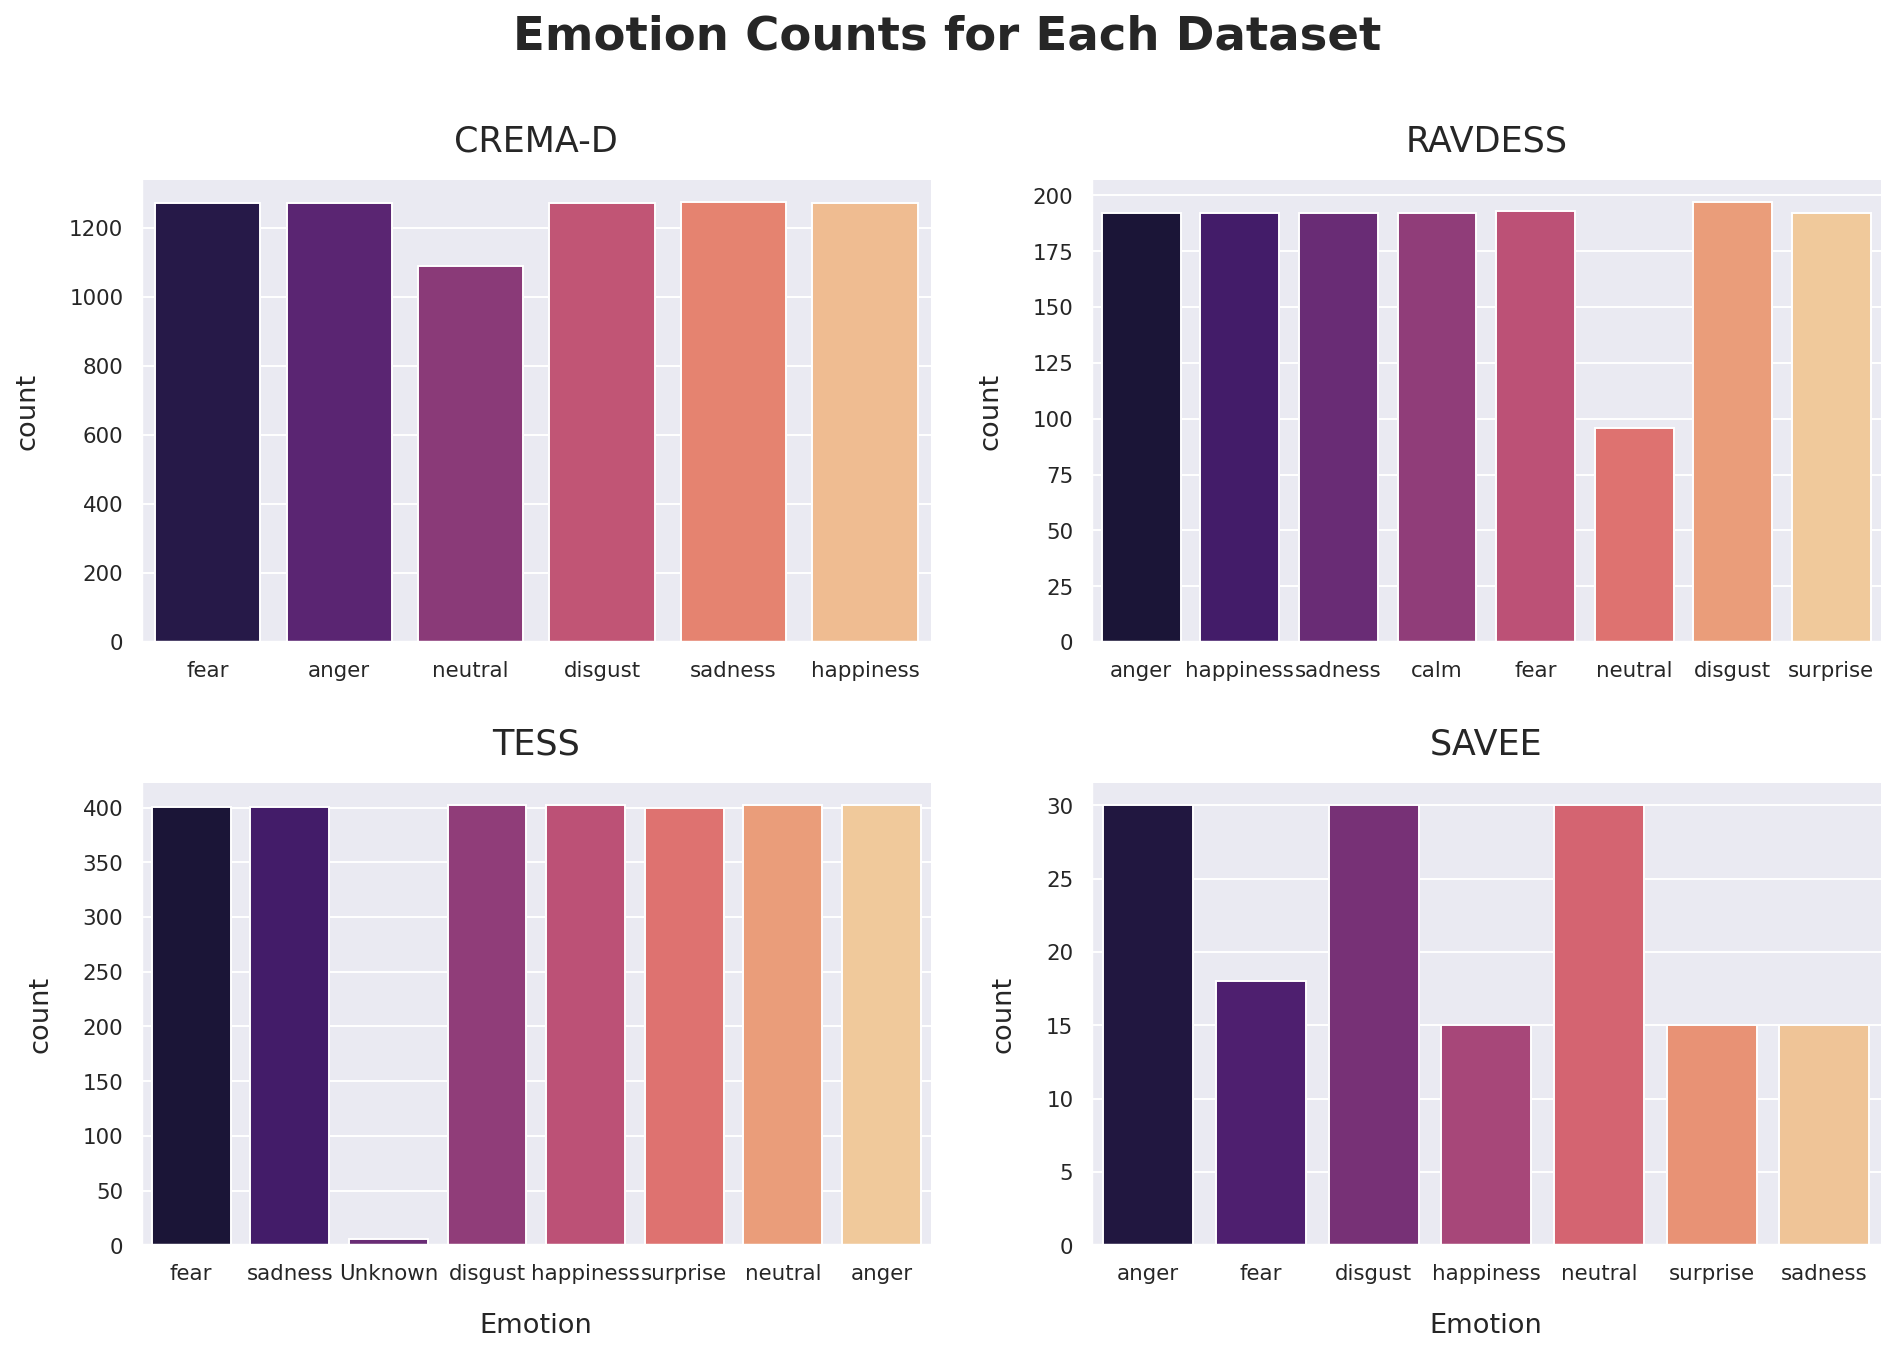

In [ ]:
# Plot the value counts for each emotion in each dataset
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.countplot(cremad_df, x = cremad_df['Emotion'], palette='magma')
plt.title('CREMA-D')
plt.xlabel('')
plt.subplot(2, 2, 2)
sns.countplot(ravdess_df, x = ravdess_df['Emotion'], palette='magma')
plt.title('RAVDESS')
plt.xlabel('')
plt.subplot(2, 2, 3)
sns.countplot(tess_df, x = tess_df['Emotion'], palette='magma')
plt.title('TESS')
plt.subplot(2, 2, 4)
sns.countplot(savee_df, x = savee_df['Emotion'], palette='magma')
plt.title('SAVEE')
plt.suptitle('Emotion Counts for Each Dataset')
# Adjust the layout so there are no overlapping titles
plt.tight_layout(pad=2)
# Remove the spines
sns.despine()
plt.show()

In [ ]:
# Count the number of emotions in each dataset
print('CREMA-D Emotion Counts:')
print(cremad_df['Emotion'].value_counts())
print('\nRAVDESS Emotion Counts:')
print(ravdess_df['Emotion'].value_counts())
print('\nTESS Emotion Counts:')
print(tess_df['Emotion'].value_counts())
print('\nSAVEE Emotion Counts:')
print(savee_df['Emotion'].value_counts())

CREMA-D Emotion Counts:
Emotion
sadness      1274
anger        1273
disgust      1273
fear         1272
happiness    1272
neutral      1089
Name: count, dtype: int64

RAVDESS Emotion Counts:
Emotion
disgust      197
fear         193
anger        192
happiness    192
sadness      192
calm         192
surprise     192
neutral       96
Name: count, dtype: int64

TESS Emotion Counts:
Emotion
disgust      402
happiness    402
neutral      402
anger        402
fear         401
sadness      401
surprise     400
Unknown        6
Name: count, dtype: int64

SAVEE Emotion Counts:
Emotion
anger        30
disgust      30
neutral      30
fear         18
happiness    15
surprise     15
sadness      15
Name: count, dtype: int64


# concatenating all datasets into one for training

In [ ]:
# Create a dataframe that contains all the emotion labels and paths from all the datasets
df = pd.concat([cremad_df, ravdess_df, tess_df, savee_df], axis=0)
# Reset the index
df = df.reset_index(drop=True)
# Inspect the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11868 entries, 0 to 11867
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  11868 non-null  object
 1   Path     11868 non-null  object
dtypes: object(2)
memory usage: 185.6+ KB


In [ ]:
# Count the number of emotions in the combined dataframe
df['Emotion'].value_counts()

,count
Emotion,
disgust,1902
anger,1897
fear,1884
sadness,1882
happiness,1881
neutral,1617
surprise,607
calm,192
Unknown,6


In [ ]:
# Drop the calm emotion as there are too few samples and it is too similar to neutral
df = df[df['Emotion'] != 'calm']
df = df[df['Emotion'] != 'Unknown']

# Check if it was dropped
df['Emotion'].value_counts()

,count
Emotion,
disgust,1902
anger,1897
fear,1884
sadness,1882
happiness,1881
neutral,1617
surprise,607


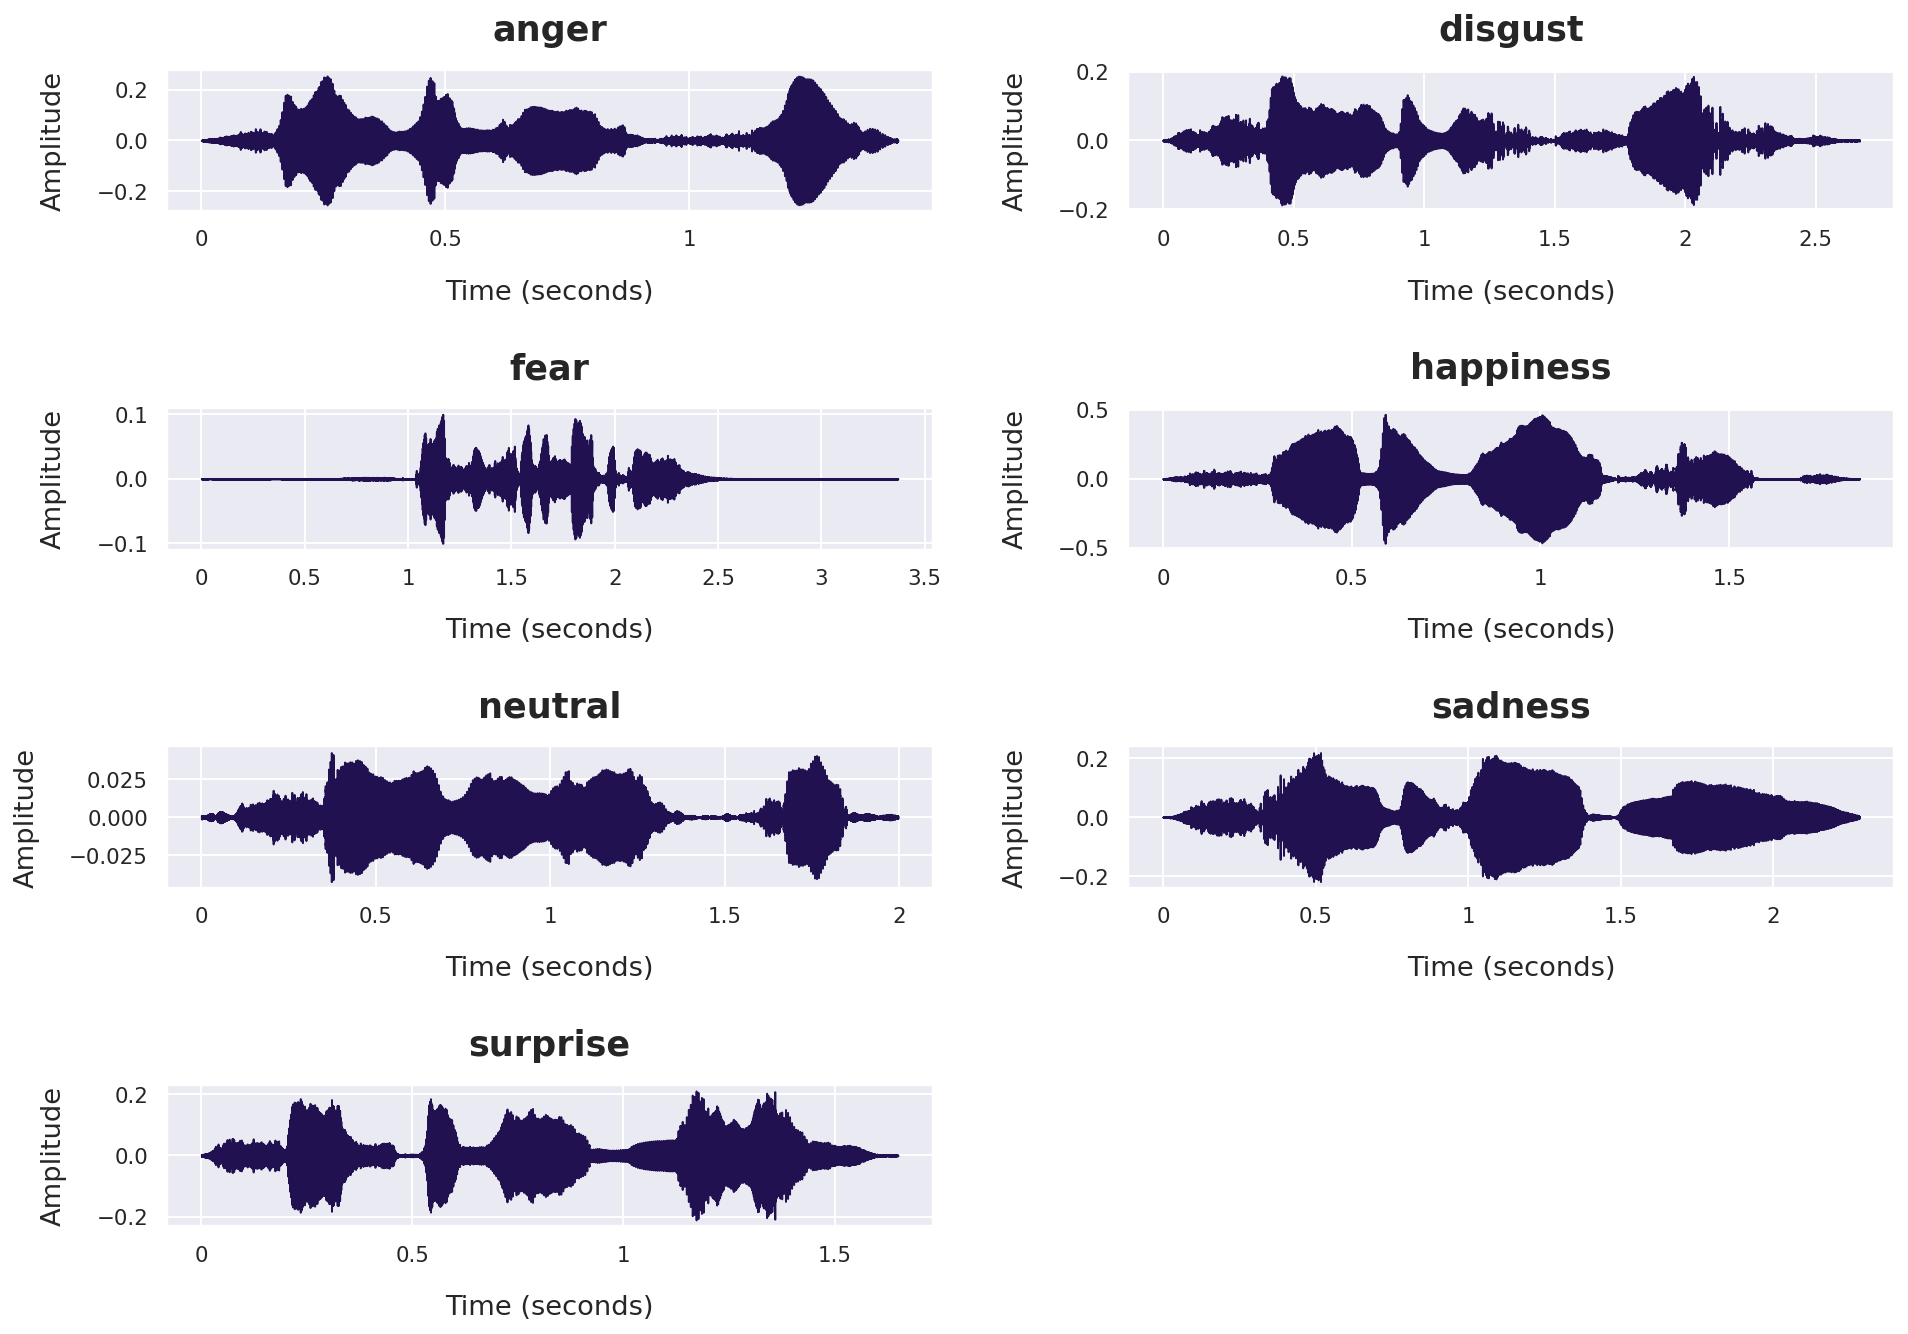

In [ ]:

# Verify and filter valid file paths
df = df[df['Path'].apply(os.path.exists)]

# Sample one file for each emotion
sample = df.groupby('Emotion', group_keys=False).apply(lambda x: x.sample(1))
sample_paths = sample['Path'].tolist()

# Set font to avoid warnings
plt.rcParams['font.family'] = 'DejaVu Sans'

# Plot waveforms
plt.figure(figsize=(14, 10))
for i in range(len(sample_paths)):
    plt.subplot(4, 2, i + 1)
    data, sr = librosa.load(sample_paths[i], sr=44100)
    librosa.display.waveshow(data, sr=sr)
    plt.title(sample['Emotion'].values[i], fontweight='bold')
    plt.ylabel('Amplitude')
    plt.xlabel('Time (seconds)')

plt.tight_layout(pad=2)
plt.show()


# creating spectogram  plot for each emotion

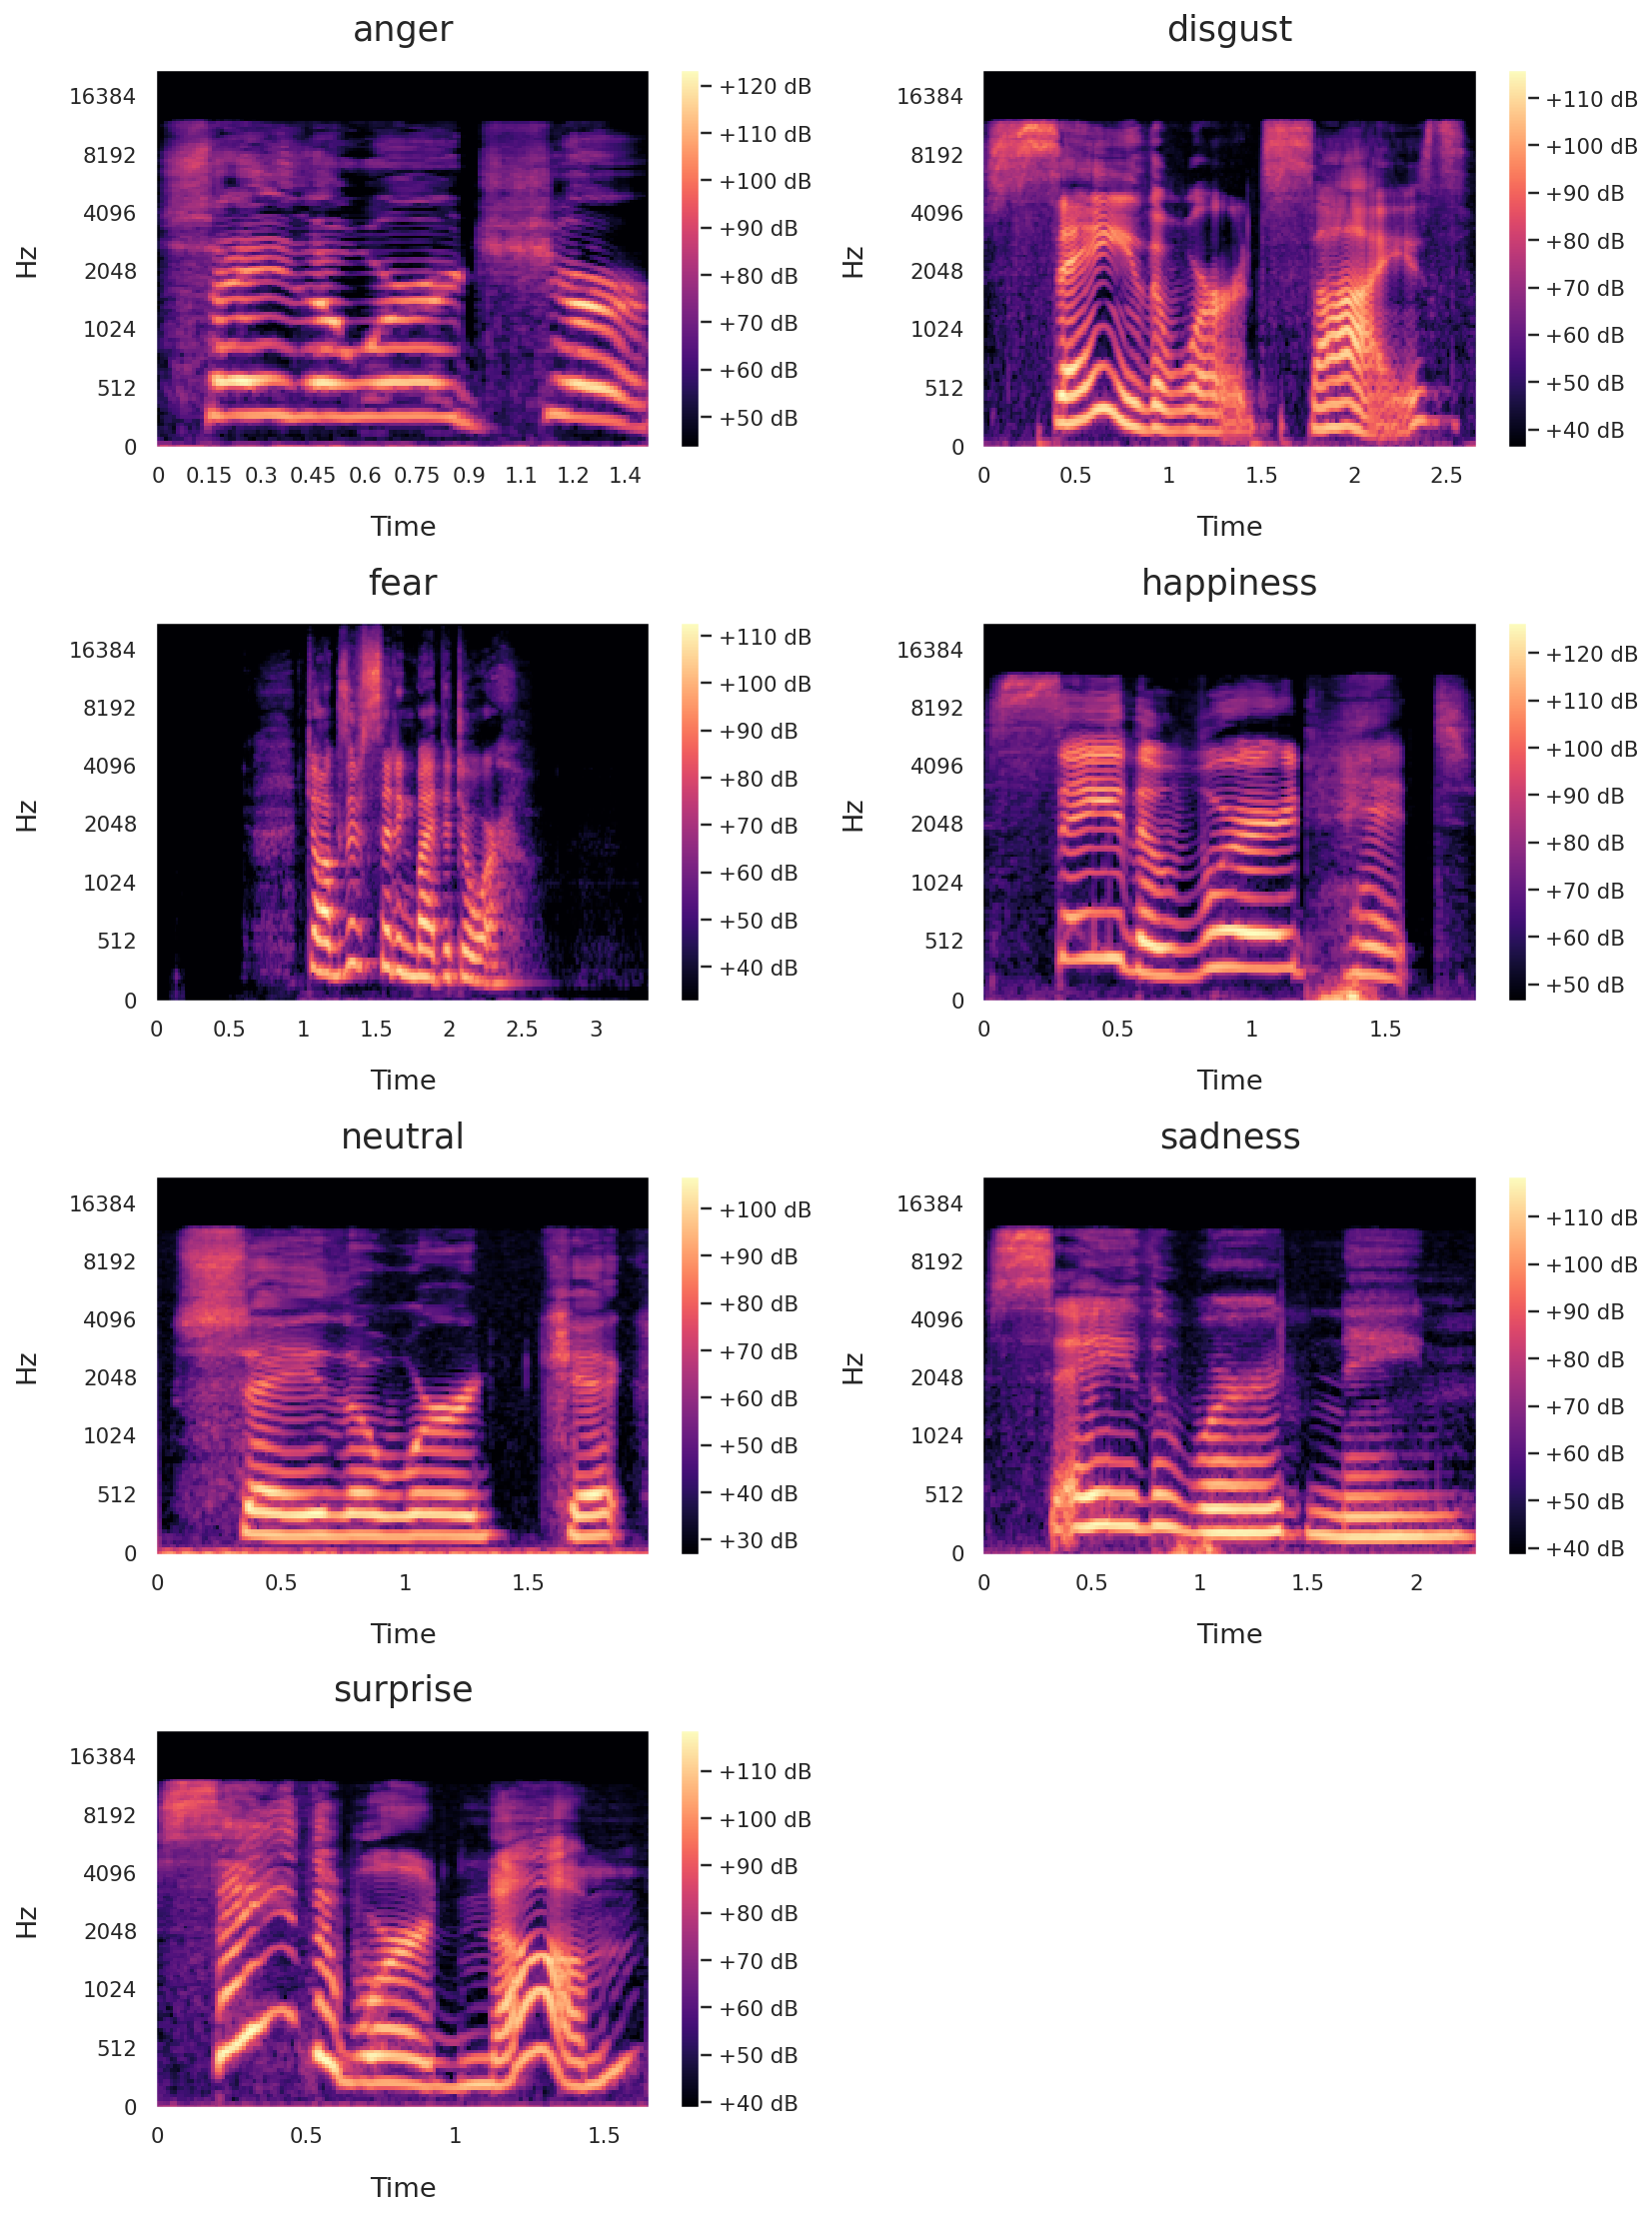

In [ ]:
# Create a spectrogram plot for each emotion
plt.figure(figsize=(12, 16))
for i in range(7):
    plt.subplot(4, 2, i+1)
    # Load the audio file, we chose sr = 44100 to standardize the sampling rate
    signal, sr = librosa.load(sample_paths[i], sr=44100)
    # Make the logarithmically scaled mel spectrogram
    signal = librosa.feature.melspectrogram(y = signal, sr=sr)
    # Convert the spectrogram from amplitude squared to decibels
    # as amplitude does not give us much information
    signal = librosa.power_to_db(signal, ref=np.min)
    # Plot the spectrogram
    librosa.display.specshow(signal, sr=sr, x_axis='time', y_axis='mel')
    plt.title(sample['Emotion'].values[i])
    # Plot a color bar to show the intensity scale from 0 Decibels to the max
    plt.colorbar(format='%+2.0f dB')
plt.tight_layout()


In [ ]:
# Encode the emotion labels into numbers
encoder = LabelEncoder()
df['Emotion'] = encoder.fit_transform(df['Emotion'])
# Make sure the encoding worked
df['Emotion'].value_counts()

,count
Emotion,
1,629
0,624
2,612
3,609
5,608
6,607
4,528


In [ ]:
# Create a function that takes an audio file path and returns the mel spectrogram
# as an image, and converts the image into a numpy array
def process_audio(path):
    '''
    Load the audio file, convert the audio file into a mel spectrogram,
    return the mel spectrogram as an image, and convert the image into a numpy array
    '''
    # Load the audio file and set the sampling rate to 44100
    audio, sr = librosa.load(path, sr=44100, duration=4, mono=True)
    # pad the audio files that are less than 4 seconds with zeros at the end
    if len(audio) < 4 * sr:
        audio = np.pad(audio, pad_width=(0, 4 * sr - len(audio)), mode='constant')
    # Convert the audio file into a mel spectrogram
    signal = librosa.feature.melspectrogram(y = audio, sr=sr, n_mels=128)
    # Convert the spectrogram from amplitude squared to decibels
    # as amplitude does not give us much information
    signal = librosa.power_to_db(signal, ref=np.min)    # Convert the image into a numpy array
    image = np.array(signal)
    # Return the image
    return image


Numpy array shape: (128, 345)


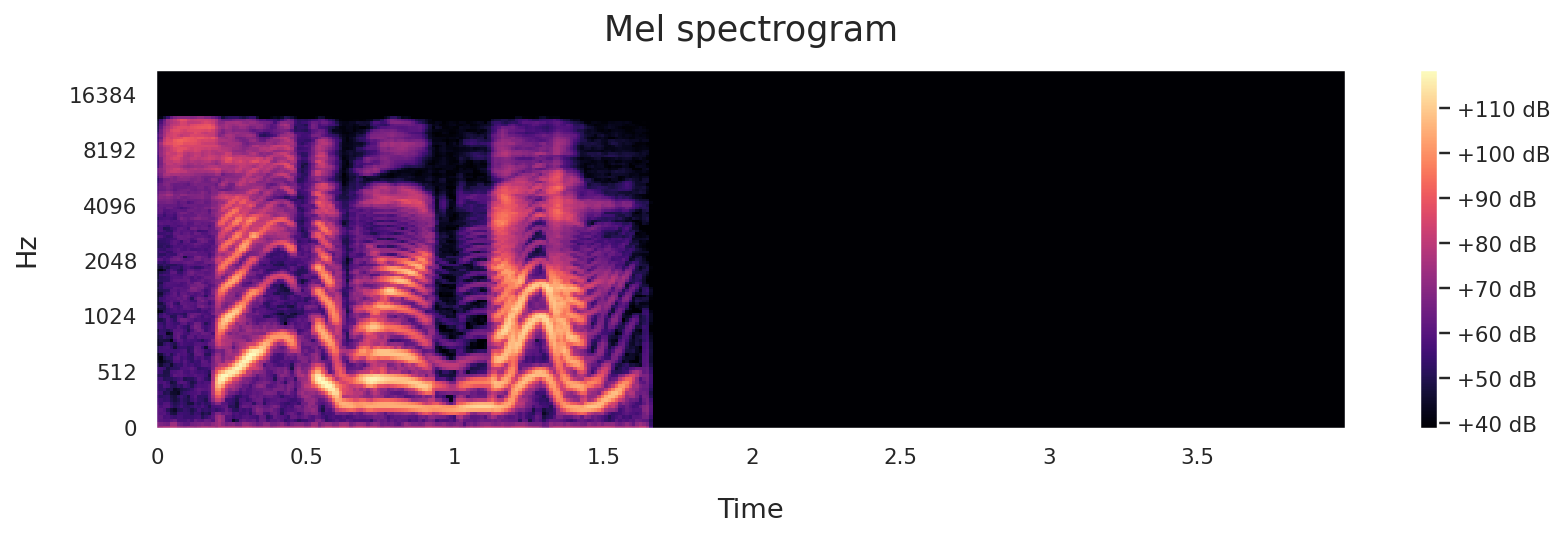

In [ ]:
# Test the function on the sample audio file
image = process_audio(sample_paths[6])
# Print the shape of the numpy array
print('Numpy array shape:', image.shape)
# Plot the image
plt.figure(figsize=(12, 4))
librosa.display.specshow(image, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()


In [ ]:
X_mel = []
y_mel = []
i = 0

# Iterate through the DataFrame to process each file
for index, row in df.iterrows():
    path = row['Path']  # Get the file path
    emotion = row['Emotion']  # Get the corresponding emotion
    if os.path.isfile(path):  # Ensure the path points to a valid file
        try:
            # Process the audio file and append the result to X_mel
            X_mel.append(process_audio(path))
            # Append the corresponding emotion to y_mel
            y_mel.append(emotion)
            i += 1
            print(f"Processed {i}: {path}, Emotion: {emotion}")
        except Exception as e:
            print(f"Error processing {path}: {e}")

# Check the lengths of the feature and label lists
print('Number of processed audio files:', len(X_mel))
print('Number of labels:', len(y_mel))


Processed 1: /content/drive/My Drive/ravdess/archive/audio_speech_actors_01-24/Actor_24/03-01-05-01-02-01-24.wav, Emotion: 0
Processed 2: /content/drive/My Drive/ravdess/archive/audio_speech_actors_01-24/Actor_24/03-01-03-02-02-01-24.wav, Emotion: 3
Processed 3: /content/drive/My Drive/ravdess/archive/audio_speech_actors_01-24/Actor_24/03-01-04-02-01-02-24.wav, Emotion: 5
Processed 4: /content/drive/My Drive/ravdess/archive/audio_speech_actors_01-24/Actor_24/03-01-04-02-02-01-24.wav, Emotion: 5
Processed 5: /content/drive/My Drive/ravdess/archive/audio_speech_actors_01-24/Actor_24/03-01-05-01-02-02-24.wav, Emotion: 0
Processed 6: /content/drive/My Drive/ravdess/archive/audio_speech_actors_01-24/Actor_24/03-01-06-01-02-01-24.wav, Emotion: 2
Processed 7: /content/drive/My Drive/ravdess/archive/audio_speech_actors_01-24/Actor_24/03-01-06-02-02-02-24.wav, Emotion: 2
Processed 8: /content/drive/My Drive/ravdess/archive/audio_speech_actors_01-24/Actor_24/03-01-06-02-01-01-24.wav, Emotion: 2


Label: 0


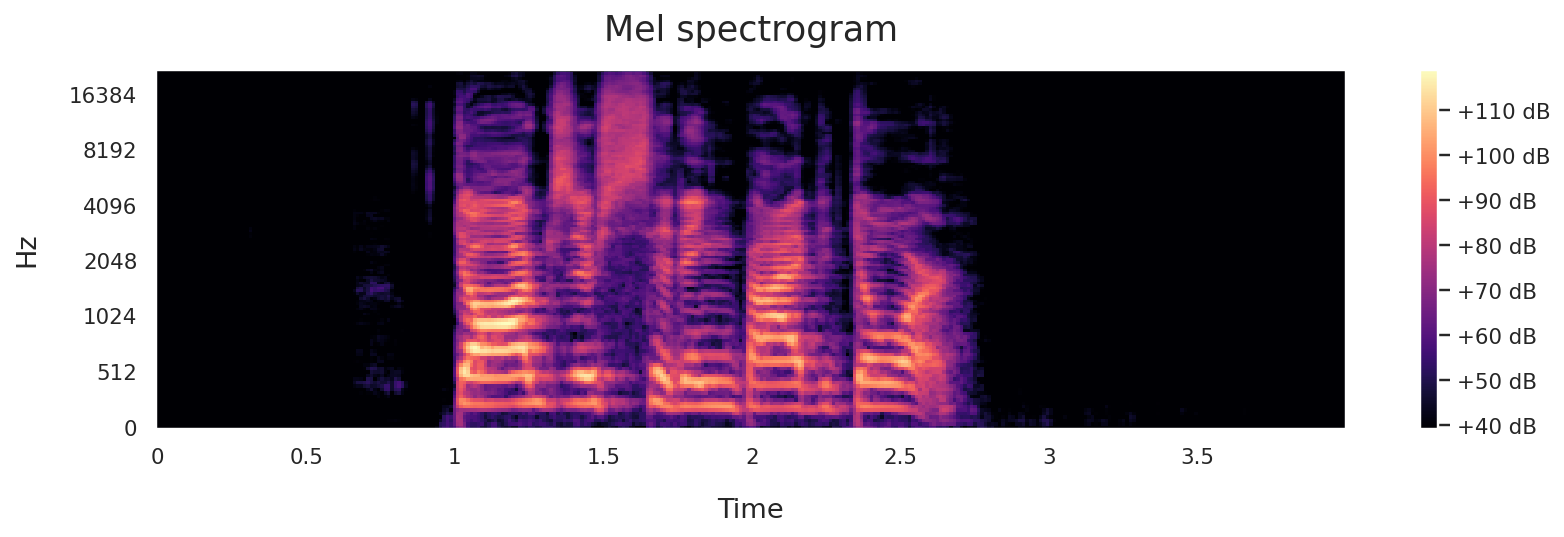

In [ ]:
# Plot the first image and its corresponding label
plt.figure(figsize=(12, 4))
librosa.display.specshow(X_mel[0], sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

# Access the first label using list indexing
print('Label:', y_mel[0])


In [ ]:
# Divide the data into training and testing sets, with a 80:20 split
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_mel, y_mel,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    shuffle=True)
# Check the length of the training and testing sets
print('Number of training images:', len(X_train_1))
print('Number of testing images:', len(X_test_1))
print('Number of training labels:', len(y_train_1))
print('Number of testing labels:', len(y_test_1))

Number of training images: 3365
Number of testing images: 842
Number of training labels: 3365
Number of testing labels: 842


In [ ]:
# Convert the lists into numpy arrays
X_train_1 = np.array(X_train_1)
X_test_1 = np.array(X_test_1)
y_train_1 = np.array(y_train_1)
y_test_1 = np.array(y_test_1)
# Check the shape of the arrays
print('X_train shape:', X_train_1.shape)
print('X_test shape:', X_test_1.shape)
print('y_train shape:', y_train_1.shape)
print('y_test shape:', y_test_1.shape)


X_train shape: (3365, 128, 345)
X_test shape: (842, 128, 345)
y_train shape: (3365,)
y_test shape: (842,)


In [ ]:
# Convert the lists into numpy arrays
X_train_1 = np.array(X_train_1)
X_test_1 = np.array(X_test_1)
y_train_1 = np.array(y_train_1)
y_test_1 = np.array(y_test_1)
# Check the shape of the arrays
print('X_train shape:', X_train_1.shape)
print('X_test shape:', X_test_1.shape)
print('y_train shape:', y_train_1.shape)
print('y_test shape:', y_test_1.shape)

X_train shape: (3365, 128, 345)
X_test shape: (842, 128, 345)
y_train shape: (3365,)
y_test shape: (842,)


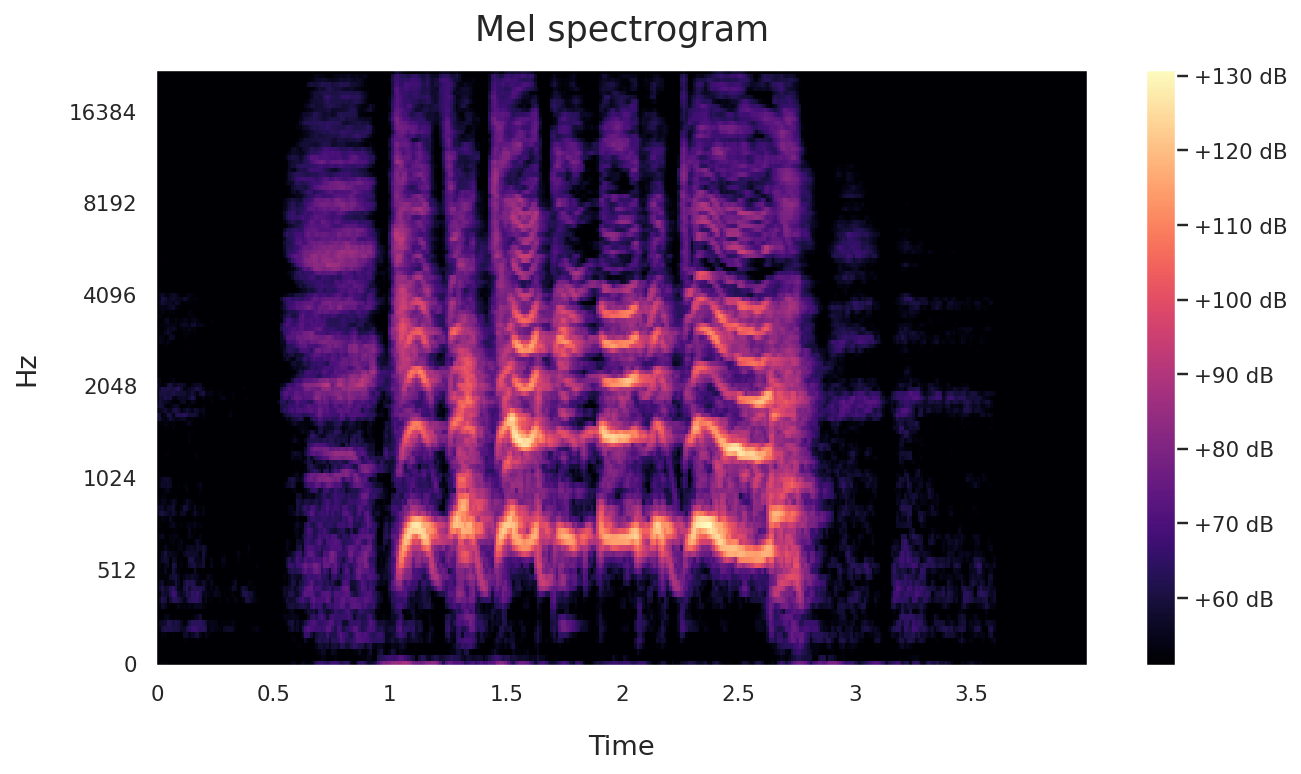

In [ ]:
# plot the first image in the training set as a mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(X_train_1[0].reshape(128, 345), sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout(pad=2)

In [ ]:
# Standardize the data by subtracting the mean and dividing by the standard deviation
mean = np.mean(X_train_1)
std = np.std(X_train_1)
X_train_1 = (X_train_1 - mean) / std
X_test_1 = (X_test_1 - mean) / std

In [ ]:
# Check the mean and standard deviation
print('Mean:', mean)
print('Standard deviation:', std)
# Check if the data is standardized
print('Mean of standardized data:', np.mean(X_train_1))
print('Standard deviation of standardized data:', np.std(X_train_1))

Mean: 48.654865
Standard deviation: 18.232607
Mean of standardized data: -6.2495137e-06
Standard deviation of standardized data: 0.9999981


In [ ]:
# Reshape the data into 4D arrays so that it can be input into the 2D CNN
X_train_1 = X_train_1.reshape(X_train_1.shape[0], 128, 345, 1)
X_test_1 = X_test_1.reshape(X_test_1.shape[0], 128, 345, 1)
# Check the shape of the arrays
print('X_train shape:', X_train_1.shape)
print('X_test shape:', X_test_1.shape)

X_train shape: (3365, 128, 345, 1)
X_test shape: (842, 128, 345, 1)


In [ ]:
# Divide the data into batches of 32 images
batch_size = 32
# Make a training dataset from the training set
train_dataset_1 = tf.data.Dataset.from_tensor_slices((X_train_1, y_train_1))
# Shuffle, batch, and prefetch the data
train_dataset_1 = train_dataset_1.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
# Make a testing dataset from the testing set
test_dataset_1 = tf.data.Dataset.from_tensor_slices((X_test_1, y_test_1))
# Shuffle, batch, and prefetch the data
test_dataset_1 = test_dataset_1.batch(batch_size).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
model_mel = tf.keras.Sequential([
    # First convolutional layer with reduced filters
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(128, 345, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),

    # Second convolutional layer with reduced filters
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),

    # Third convolutional layer with reduced filters
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),

    # Global average pooling for dimensionality reduction
    tf.keras.layers.GlobalAveragePooling2D(),

    # Dropout with reduced rate
    tf.keras.layers.Dropout(0.3),

    # Final dense layer
    tf.keras.layers.Dense(7, activation='softmax')
])


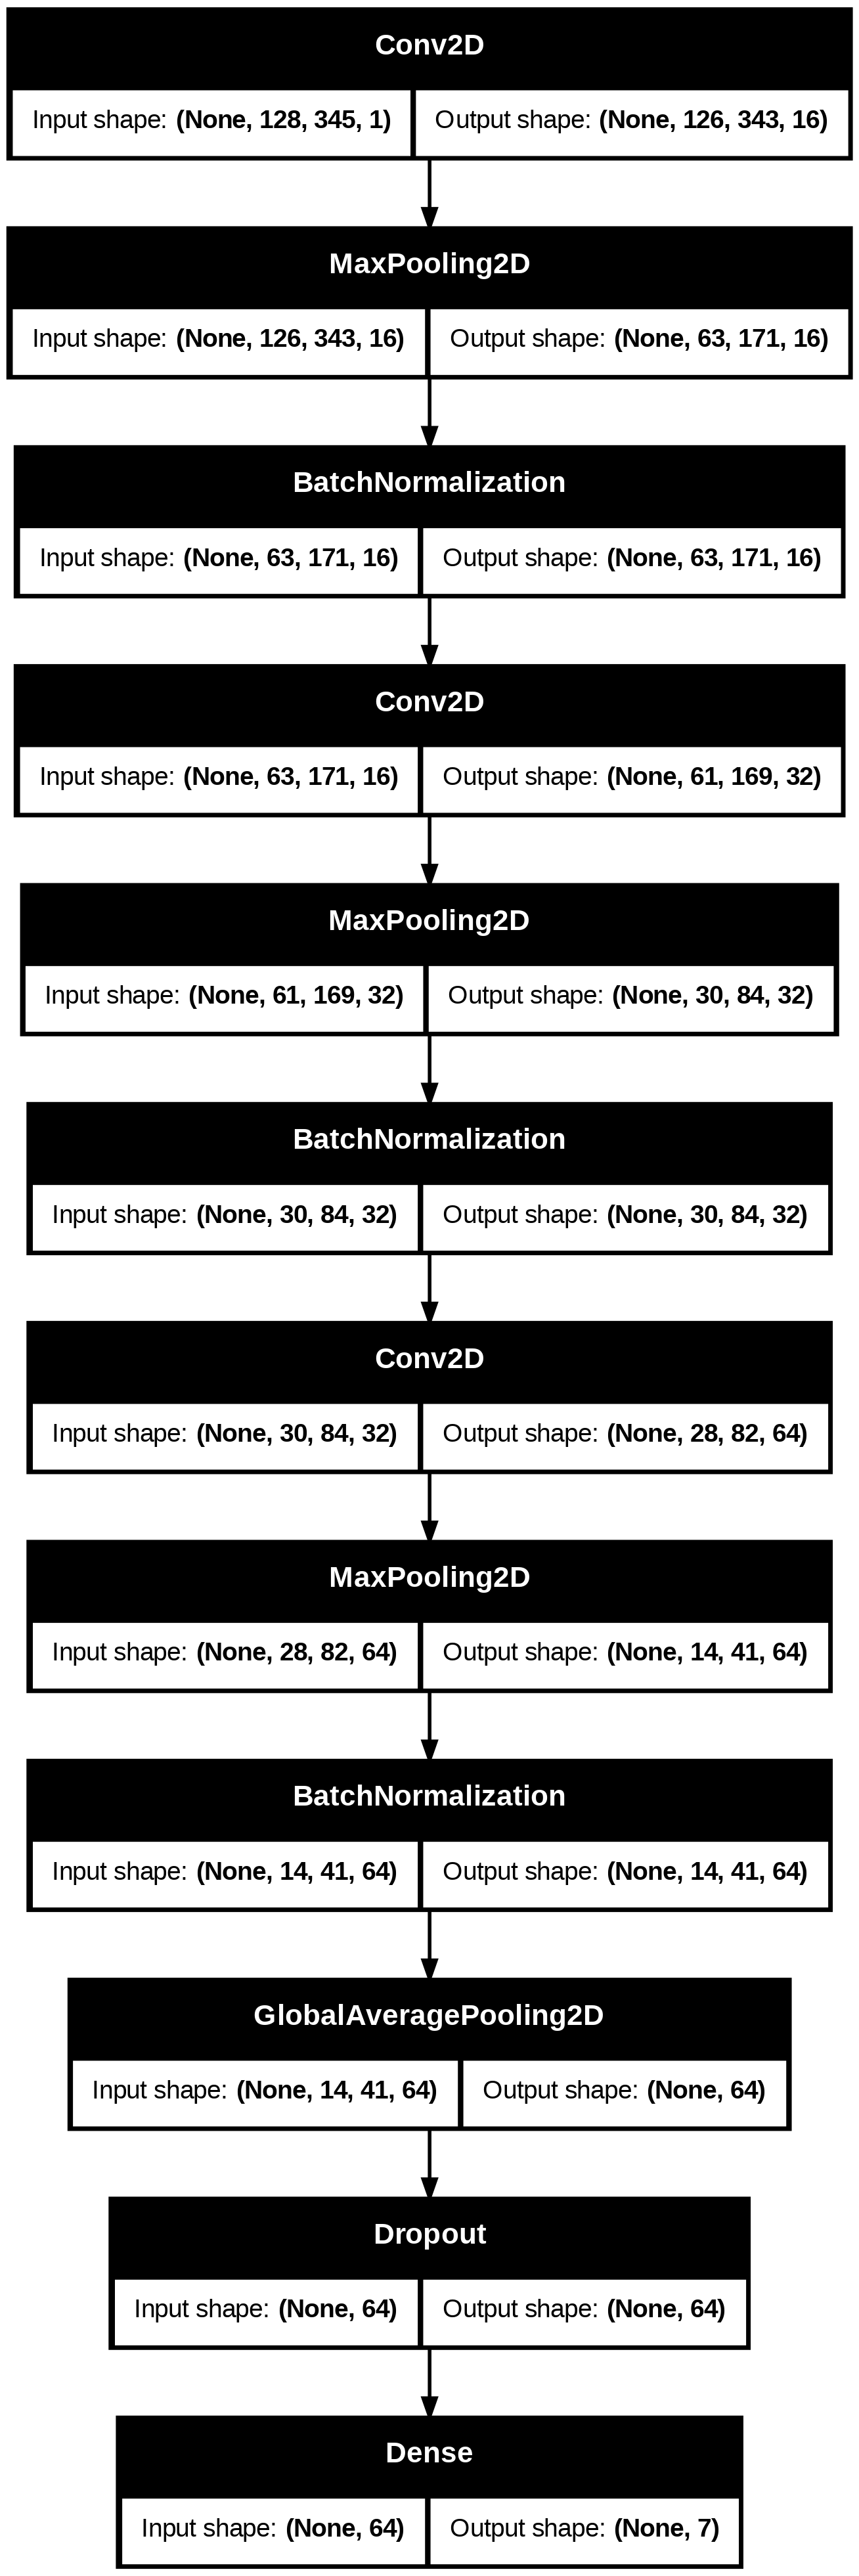

In [ ]:
# Compile the model
model_mel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Plot the model architecture
tf.keras.utils.plot_model(model_mel, show_shapes=True, to_file='model_mel.png')

In [ ]:
# # Create a callback that stops training when the validation loss plateaus or increases
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, mode = 'min')

# Create a callback that adjusts the learning rate gradually
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                    factor=0.2,
                                                    min_lr=0.000001,
                                                    patience=3,
                                                    mode='min')





# Initialize a deque to store the last 1000 iterations of weights
weights_history = deque(maxlen=1000)

# Custom callback to save weights during training
class SaveWeightsCallback(tf.keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        # Save the model's current weights at the end of each batch
        weights = self.model.get_weights()  # Get model weights
        flattened_weights = np.concatenate([w.flatten() for w in weights])  # Flatten and concatenate
        weights_history.append(flattened_weights)  # Append to deque

# Initialize the callback
save_weights_callback = SaveWeightsCallback()

# Train the model with the custom callback
history_mel = model_mel.fit(
    train_dataset_1,
    epochs=40,
    validation_data=test_dataset_1,
    callbacks=[early_stop, lr_scheduler, save_weights_callback]
)

# Convert deque to a NumPy array after training
weights_history_np = np.array(weights_history)

# Inspect the shape of the saved weights
print("Shape of weights history:", weights_history_np.shape)

# Optionally save weights history to a file
np.save("weights_history.npy", weights_history_np)




Epoch 1/40
 15/106 ━━━━━━━━━━━━━━━━━━━━ 3:18 2s/step - accuracy: 0.8723 - loss: 0.4436

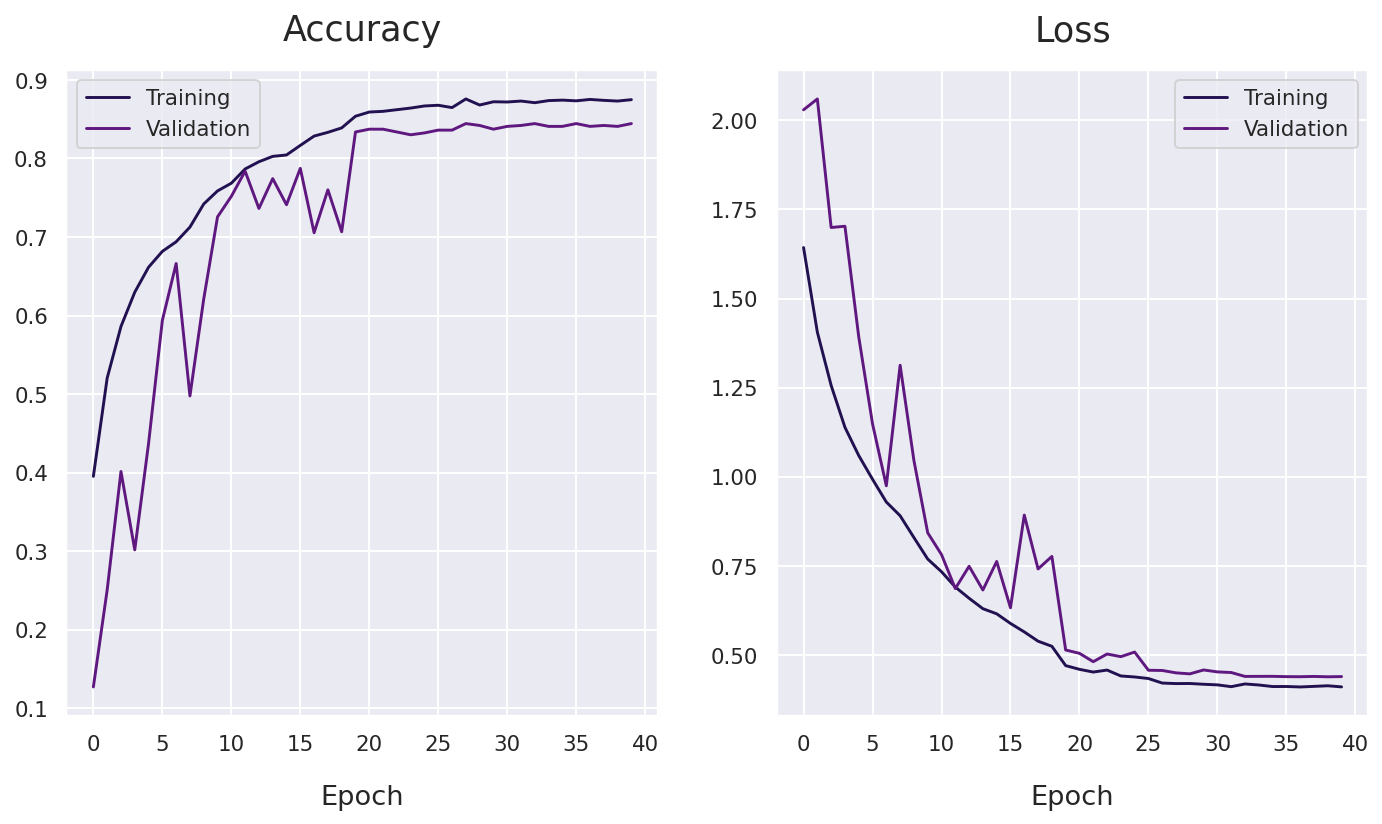

In [ ]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_mel.history['accuracy'], label='Training')
plt.plot(history_mel.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()
# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_mel.history['loss'], label='Training')
plt.plot(history_mel.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

In [ ]:
# Mount your Google Drive
drive.mount('/content/drive')
save_path = '/content/drive/My Drive/reduced_weights_history_mel_spectrogarm.npy'

# Save the weights_history_np array
np.save(save_path, weights_history_np)

print(f"Weights history saved to: {save_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Weights history saved to: /content/drive/My Drive/reduced_weights_history_mel_spectrogarm.npy


# calcuating pesistent homolpgy dimension

In [ ]:
def sample_W(W, nSamples, isRandom=True):
    n = W.shape[0]
    random_indices = np.random.choice(n, size=nSamples, replace=False)
    return W[random_indices]


def calculate_ph_dim(
    W, min_points=200, max_points=1000, point_jump=50, h_dim=0, print_error=False
):
    from ripser import ripser

    # sample_fn should output a [num_points, dim] array

    # sample our points
    test_n = range(min_points, max_points, point_jump)
    lengths = []
    for n in test_n:
        diagrams = ripser(sample_W(W, n))[
            "dgms"
        ]  # list of persistance diagram for differnt homology dimension

        if len(diagrams) > h_dim:
            d = diagrams[h_dim]
            d = d[d[:, 1] < np.inf]
            lengths.append((d[:, 1] - d[:, 0]).sum())
        else:
            lengths.append(0.0)
    lengths = np.array(lengths)
    # compute our ph dim by running a linear least squares
    x = np.log(np.array(list(test_n)))
    y = np.log(lengths)
    N = len(x)
    m = (N * (x * y).sum() - x.sum() * y.sum()) / (N * (x**2).sum() - x.sum() ** 2)
    b = y.mean() - m * x.mean()

    error = ((y - (m * x + b)) ** 2).mean()

    if print_error:
        print(f"Ph Dimension Calculation has an approximate error of: {error}.")
    return 1 / (1 - m)


In [ ]:

ph_dim = calculate_ph_dim(weights_history_np)
print(f" the approximated PH dimension is {ph_dim}")

# Specify the path where you want to save the file
save_ph_path = '/content/drive/My Drive/mel_spectogram_reduced_phd_dimension.txt'

# Save the `ph_dim` value to the text file
with open(save_ph_path, 'w') as f:
    f.write(f"The approximated PH dimension is {ph_dim}\n")

print(f"PH dimension saved to: {save_ph_path}")

 the approximated PH dimension is 2.0202973178381285
PH dimension saved to: /content/drive/My Drive/mel_spectogram_reduced_phd_dimension.txt


In [ ]:
# Measure the precision and recall
y_pred = model_mel.predict(X_test_1)
# Convert the predictions into one-hot encoded vectors
y_pred = np.argmax(y_pred, axis=1)
# Plot the classification report
print(classification_report(y_test_1, y_pred, target_names=encoder.classes_))

27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 424ms/step
              precision    recall  f1-score   support

       anger       0.88      0.85      0.87       131
     disgust       0.85      0.86      0.85       119
        fear       0.80      0.84      0.82       118
   happiness       0.80      0.68      0.74       117
     neutral       0.95      0.89      0.92       109
     sadness       0.80      0.84      0.82       128
    surprise       0.81      0.93      0.86       120

    accuracy                           0.84       842
   macro avg       0.84      0.84      0.84       842
weighted avg       0.84      0.84      0.84       842



27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 363ms/step


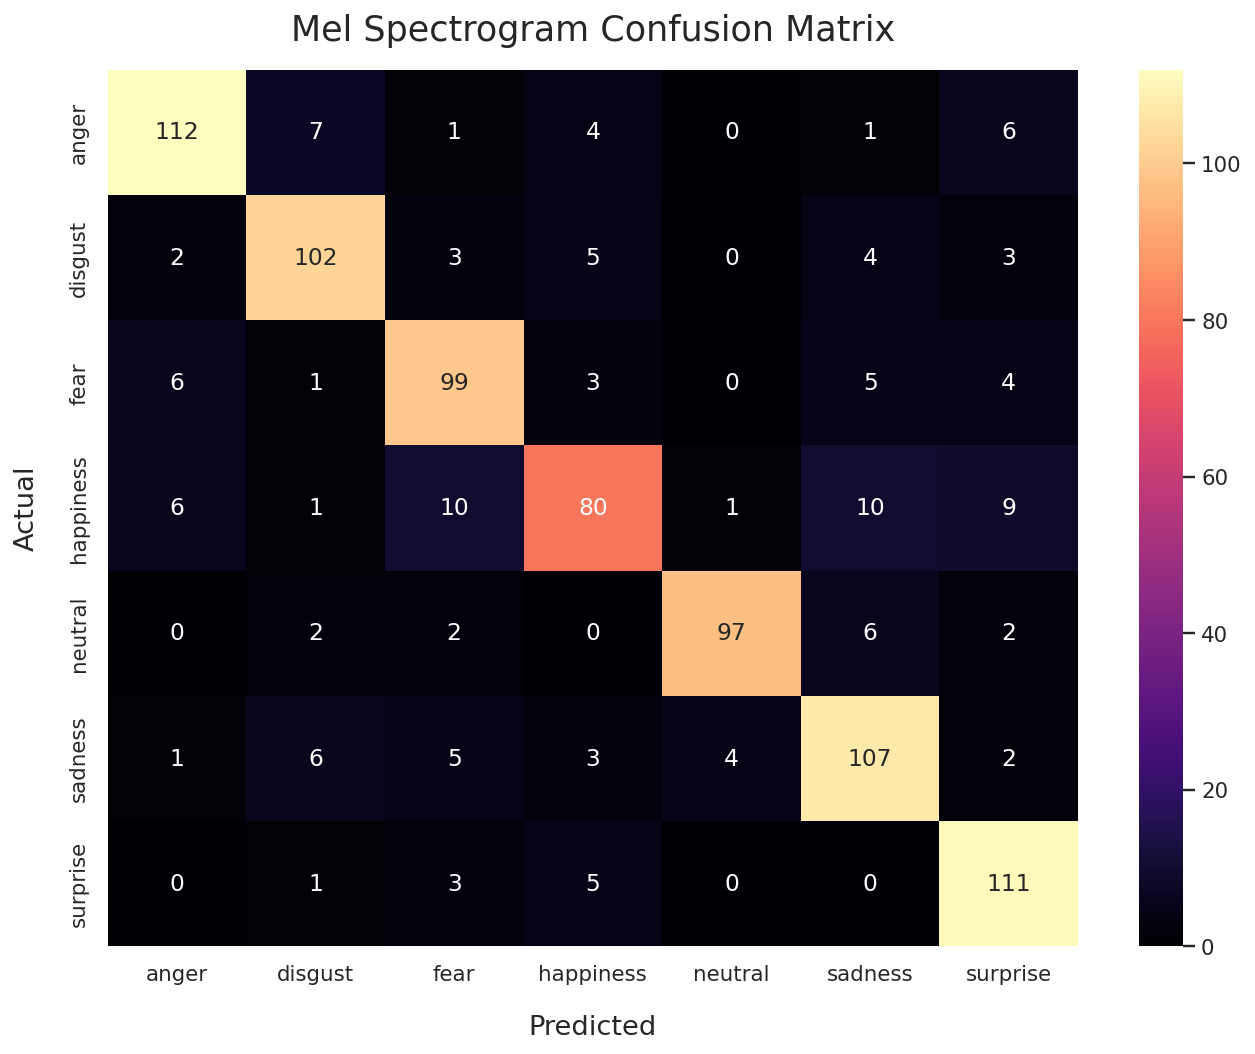

In [ ]:
# Plot the confusion matrix for the validation set
# Get the predictions for the test data
y_pred = model_mel.predict(X_test_1)
# Convert the predictions into one-hot encoded vectors
y_pred = np.argmax(y_pred, axis=1)
# Get the confusion matrix
cm = tf.math.confusion_matrix(y_test_1, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(10, 8))
# Make the index and column labels the emotion names
cm = pd.DataFrame(cm.numpy(), index=encoder.classes_, columns=encoder.classes_)
sns.heatmap(cm, annot=True, fmt='', cmap='magma')
plt.title('Mel Spectrogram Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout(pad=2)